To help us get a better performance, we can create new features based on the original features of our dataset.

Some new features created here were based on the great ideas shown on this brilliant notebook from Gunes Evitan:

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O
import matplotlib.pyplot as plt

In [2]:
%%time
info_content_raw_df = pd.read_csv('data/Info_Content.csv', index_col='ucid')
#info_userdata_raw_df = pd.read_csv('data/Info_UserData.csv', index_col='uuid')
log_problem_raw_df = pd.read_csv('data/Log_Problem.csv', index_col='upid')

Wall time: 1min 21s


In [3]:
info_content_df = info_content_raw_df.copy()

In [4]:
# scale down some records
log_problem_df = log_problem_raw_df[log_problem_raw_df['timestamp_TW'] < '2019-01-01']

### Merging Datasets

In [5]:
merge_log_problem_info_content_df = log_problem_df.merge(info_content_df, how='left', on = 'ucid')

In [6]:
merge_log_problem_info_content_df.head()

,timestamp_TW,uuid,ucid,problem_number,exercise_problem_repeat_session,is_correct,total_sec_taken,total_attempt_cnt,used_hint_cnt,is_hint_used,...,level,content_pretty_name,content_kind,difficulty,subject,learning_stage,level1_id,level2_id,level3_id,level4_id
0,2018-09-28 20:00:00 UTC,Kpq2q+eKw/O+6/jLs3XJosgmI7weEJxJZdnkKTbbF8I=,Ps4dfShfpeMF3VG030HqZ2bsbD7PaVxvJYFTtroeSzQ=,2,1,True,11,1,0,False,...,0,【基礎】倍數的應用,Exercise,easy,math,elementary,aH0Dz0KdH9gio7rrcGRHvrmd9vcd/0WJbeEFB7qeUKA=,7f73q332BKPBXaixasa4EkUb+pF6VAsLxNIg4506JJs=,ItasYR+er/FlZlRvL66/NB3wY0AvmlrZKoqe4gmPyD0=,VHYt8IeoqiIPVsB+32JAhIjK9jU+pnr11fL80QshARI=
1,2018-09-28 10:15:00 UTC,0+VU/Zb0Q96uoByuRhl7r9bJuJO6CKWpsmNMEuijSzc=,/d39FzqaM3PZzpoMXxA80PMICsVhzfL6MGSCqZtsQOo=,6,1,True,26,1,0,False,...,0,【基礎】找出最小公倍數,Exercise,easy,math,elementary,aH0Dz0KdH9gio7rrcGRHvrmd9vcd/0WJbeEFB7qeUKA=,7f73q332BKPBXaixasa4EkUb+pF6VAsLxNIg4506JJs=,ItasYR+er/FlZlRvL66/NB3wY0AvmlrZKoqe4gmPyD0=,VHYt8IeoqiIPVsB+32JAhIjK9jU+pnr11fL80QshARI=
2,2018-09-05 20:00:00 UTC,g8DnYvIqpolw10XlwWeIWv6NbDPByUbmgH8EshJqBns=,YuGOmB+frbM8rfAa0RJE882R+IoMf9N89OiVqLbAHBw=,4,1,True,78,1,0,False,...,0,【基礎】尋找質因數,Exercise,easy,math,elementary,aH0Dz0KdH9gio7rrcGRHvrmd9vcd/0WJbeEFB7qeUKA=,7f73q332BKPBXaixasa4EkUb+pF6VAsLxNIg4506JJs=,ItasYR+er/FlZlRvL66/NB3wY0AvmlrZKoqe4gmPyD0=,DoAefIneFglvkxJ4Jb8VyB8JrESm9UEHtGyV4MqiwCo=
3,2018-09-14 16:30:00 UTC,kSyUTFlepsYUD723IPL/jEZ520xaKbscrBmNtBUFR1o=,BG1RsWojzEHzV28RBm/1iKi1NyZgDcDomLYEJSV6lmo=,3,1,True,7,1,0,False,...,0,【基礎】數的相關名詞介紹,Exercise,easy,math,junior,aH0Dz0KdH9gio7rrcGRHvrmd9vcd/0WJbeEFB7qeUKA=,xYDz4OEv0xsri1IpmXlrgMLJ848rgySf+39xWpq4DBI=,/yqeM1FRP1rB9WuQWBkStMqrBQgjEexaeyWIhBC7ov4=,Vuo8t3kw/4IH80FuZ0l0uJPwpfrMs8SxhCbJA8zn3vU=
4,2018-09-13 16:00:00 UTC,XMFbFA7C49+LRhUddhelfPpA6F5dbOoxeyL3eYbuTlY=,qPHR8aBqOhKij9IS/Y8IR8prwWruoDBGU1tVUhXDJkE=,12,1,True,48,1,0,False,...,1,【基礎】大數的加減,Exercise,easy,math,elementary,aH0Dz0KdH9gio7rrcGRHvrmd9vcd/0WJbeEFB7qeUKA=,7f73q332BKPBXaixasa4EkUb+pF6VAsLxNIg4506JJs=,scsWmkZsfmdmD2IzB24sQ1Au1BOXYgQEx9zO3+4glq8=,hq6uCe9NmtCc+0wlbGGIsxegP2cqYAdFebGd+v4/o8Q=


In [7]:
content_correct = merge_log_problem_info_content_df.groupby('ucid')['is_correct'].apply(lambda x: np.sum(x)/len(x)).reset_index()

In [8]:
content_correct.head()

,ucid,is_correct
0,+DlgHAr1GtoQgtGqwoen6pt4/ayVRO+rMaCVZ7jGCHE=,0.481413
1,+IgBffWedJpxG6Zo/kHbrgIRR4jwwTwa6nV03GLwX5A=,0.496226
2,+Lgj0Me9/8gtiruGKq8KxemAD15kU4yCfb6nteNDWjw=,0.676692
3,+N+e7SzcUVowUo7D4udR8rBKRmR1H7yuu5Tleqlhv48=,0.642150
4,+ZVl8HEbTM1GOoCTt2wxAfzQswvAWL3L8e5mLuyy1dY=,0.628628


In [9]:
content_correct.rename(columns={'is_correct': 'content_correct_rate'}, inplace=True)

In [10]:
info_content_df = pd.merge(info_content_df, content_correct, how='left', on=['ucid'])

In [11]:
info_content_df

,ucid,content_pretty_name,content_kind,difficulty,subject,learning_stage,level1_id,level2_id,level3_id,level4_id,content_correct_rate
0,odIwFdIiecFwVUAEEV40K3MSuCSlIZkbq92Zp9tkZq8=,【基礎】怎樣解題：數量關係,Exercise,easy,math,elementary,aH0Dz0KdH9gio7rrcGRHvrmd9vcd/0WJbeEFB7qeUKA=,ICgke8JJv5eapCPwyj1aco8PEtoBkUbTZYIqxmYtqBk=,bo3jsx1beVLEZ+2sckxdZNYnlLpVS7hb5lWU2baQ66k=,KPJMQebU0O24+NzlQ4udb2BXLlKV1Hte61+hV5Xb+oU=,0.670543
1,dfeeBaa8zDhWS6nu7zeXKwLyi4zqEajI3tJM9/fSBPM=,【基礎】和差問題 1,Exercise,easy,math,elementary,aH0Dz0KdH9gio7rrcGRHvrmd9vcd/0WJbeEFB7qeUKA=,ICgke8JJv5eapCPwyj1aco8PEtoBkUbTZYIqxmYtqBk=,bo3jsx1beVLEZ+2sckxdZNYnlLpVS7hb5lWU2baQ66k=,KPJMQebU0O24+NzlQ4udb2BXLlKV1Hte61+hV5Xb+oU=,0.614334
2,C2AT0OBTUn+PRxEVd39enhW/DJtka1Tk90DUAR6yVdA=,【基礎】雞兔問題 1,Exercise,easy,math,elementary,aH0Dz0KdH9gio7rrcGRHvrmd9vcd/0WJbeEFB7qeUKA=,ICgke8JJv5eapCPwyj1aco8PEtoBkUbTZYIqxmYtqBk=,bo3jsx1beVLEZ+2sckxdZNYnlLpVS7hb5lWU2baQ66k=,KPJMQebU0O24+NzlQ4udb2BXLlKV1Hte61+hV5Xb+oU=,0.623229
3,jZvYpEa6VB/WrlKKmQHnfbv/xJ4OypBzq0epVcn500Q=,【基礎】年齡問題 1,Exercise,easy,math,elementary,aH0Dz0KdH9gio7rrcGRHvrmd9vcd/0WJbeEFB7qeUKA=,ICgke8JJv5eapCPwyj1aco8PEtoBkUbTZYIqxmYtqBk=,bo3jsx1beVLEZ+2sckxdZNYnlLpVS7hb5lWU2baQ66k=,KPJMQebU0O24+NzlQ4udb2BXLlKV1Hte61+hV5Xb+oU=,0.684831
4,M+UxJPgRIW57a0YS3eik8A9YDj+AwaMpTa5yWYn/kAw=,【基礎】追趕問題,Exercise,easy,math,elementary,aH0Dz0KdH9gio7rrcGRHvrmd9vcd/0WJbeEFB7qeUKA=,ICgke8JJv5eapCPwyj1aco8PEtoBkUbTZYIqxmYtqBk=,bo3jsx1beVLEZ+2sckxdZNYnlLpVS7hb5lWU2baQ66k=,KPJMQebU0O24+NzlQ4udb2BXLlKV1Hte61+hV5Xb+oU=,0.710526
...,...,...,...,...,...,...,...,...,...,...,...
1325,NPkrCjbLK35wefMCv6y6XMO5eYO/gthS6LGwrdjG2OQ=,【進階】平方公分綜合習題,Exercise,hard,math,elementary,aH0Dz0KdH9gio7rrcGRHvrmd9vcd/0WJbeEFB7qeUKA=,7f73q332BKPBXaixasa4EkUb+pF6VAsLxNIg4506JJs=,8OFhw5s0EmQIKBlKbJL+Dvp+u3ss4rN3foLwLM4xXls=,JtYpwXqNWwRqPrXYh0JhE2lEEUI1gKRPdDH3jYwhqMo=,0.861973
1326,3xqxJN2W+KEo3SBjh7HnXpGjB4ewSbm1j/18fCn05yc=,【進階】周長與面積綜合習題,Exercise,hard,math,elementary,aH0Dz0KdH9gio7rrcGRHvrmd9vcd/0WJbeEFB7qeUKA=,7f73q332BKPBXaixasa4EkUb+pF6VAsLxNIg4506JJs=,8OFhw5s0EmQIKBlKbJL+Dvp+u3ss4rN3foLwLM4xXls=,Ny1/uHUXA4pvWVN1nVWv+vsdaQde7StyoQV8HAyJD80=,0.475296
1327,j4rGpwpqhLE9foelXD2yjokS0u3QR+ULhNqLGeF/4sk=,【一般】平方公分綜合習題,Exercise,normal,math,elementary,aH0Dz0KdH9gio7rrcGRHvrmd9vcd/0WJbeEFB7qeUKA=,7f73q332BKPBXaixasa4EkUb+pF6VAsLxNIg4506JJs=,8OFhw5s0EmQIKBlKbJL+Dvp+u3ss4rN3foLwLM4xXls=,JtYpwXqNWwRqPrXYh0JhE2lEEUI1gKRPdDH3jYwhqMo=,0.767375
1328,W4l0TIo0YQXLT/c8/Uy7OLtElmNuNWPODI7HkJ0NaI0=,【一般】周長與面積綜合習題,Exercise,normal,math,elementary,aH0Dz0KdH9gio7rrcGRHvrmd9vcd/0WJbeEFB7qeUKA=,7f73q332BKPBXaixasa4EkUb+pF6VAsLxNIg4506JJs=,8OFhw5s0EmQIKBlKbJL+Dvp+u3ss4rN3foLwLM4xXls=,Ny1/uHUXA4pvWVN1nVWv+vsdaQde7StyoQV8HAyJD80=,0.536224


In [12]:
info_content_df.shape

(1330, 11)

In [13]:
info_content_df['content_correct_rate'].describe()

count    1315.000000
mean        0.662686
std         0.145005
min         0.000000
25%         0.562178
50%         0.678512
75%         0.767450
max         1.000000
Name: content_correct_rate, dtype: float64

In [14]:
info_content_df['content_correct_rate'].value_counts()

0.666667    3
0.594595    3
0.850915    2
0.681818    2
0.648393    2
           ..
0.473968    1
0.614062    1
0.398667    1
0.446175    1
0.910714    1
Name: content_correct_rate, Length: 1292, dtype: int64

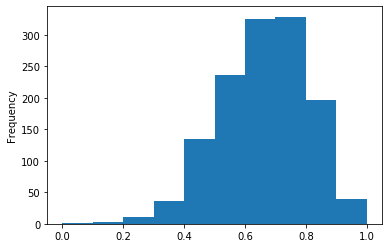

In [25]:
info_content_df['content_correct_rate'].plot.hist()

In [15]:
problem_correct = log_problem_df.groupby(['ucid','problem_number'])['is_correct'].apply(lambda x: np.sum(x)/len(x)).reset_index()

In [16]:
problem_correct.shape

(105849, 3)

In [17]:
problem_correct.rename(columns={'is_correct': 'problem_correct_rate'}, inplace=True)

In [18]:
problem_correct.head()

,ucid,problem_number,problem_correct_rate
0,+DlgHAr1GtoQgtGqwoen6pt4/ayVRO+rMaCVZ7jGCHE=,1,0.561404
1,+DlgHAr1GtoQgtGqwoen6pt4/ayVRO+rMaCVZ7jGCHE=,2,0.528302
2,+DlgHAr1GtoQgtGqwoen6pt4/ayVRO+rMaCVZ7jGCHE=,3,0.627451
3,+DlgHAr1GtoQgtGqwoen6pt4/ayVRO+rMaCVZ7jGCHE=,4,0.521739
4,+DlgHAr1GtoQgtGqwoen6pt4/ayVRO+rMaCVZ7jGCHE=,5,0.522727


In [19]:
problem_correct['problem_correct_rate']

0         0.561404
1         0.528302
2         0.627451
3         0.521739
4         0.522727
            ...   
105844    1.000000
105845    0.000000
105846    1.000000
105847    1.000000
105848    1.000000
Name: problem_correct_rate, Length: 105849, dtype: float64

In [20]:
log_problem_df = pd.merge(log_problem_df, problem_correct, how='left', on=['ucid','problem_number'])

In [21]:
log_problem_df.head()

,timestamp_TW,uuid,ucid,problem_number,exercise_problem_repeat_session,is_correct,total_sec_taken,total_attempt_cnt,used_hint_cnt,is_hint_used,is_downgrade,is_upgrade,level,problem_correct_rate
0,2018-09-28 20:00:00 UTC,Kpq2q+eKw/O+6/jLs3XJosgmI7weEJxJZdnkKTbbF8I=,Ps4dfShfpeMF3VG030HqZ2bsbD7PaVxvJYFTtroeSzQ=,2,1,True,11,1,0,False,NaN,NaN,0,0.619795
1,2018-09-28 10:15:00 UTC,0+VU/Zb0Q96uoByuRhl7r9bJuJO6CKWpsmNMEuijSzc=,/d39FzqaM3PZzpoMXxA80PMICsVhzfL6MGSCqZtsQOo=,6,1,True,26,1,0,False,NaN,NaN,0,0.712617
2,2018-09-05 20:00:00 UTC,g8DnYvIqpolw10XlwWeIWv6NbDPByUbmgH8EshJqBns=,YuGOmB+frbM8rfAa0RJE882R+IoMf9N89OiVqLbAHBw=,4,1,True,78,1,0,False,NaN,NaN,0,0.856749
3,2018-09-14 16:30:00 UTC,kSyUTFlepsYUD723IPL/jEZ520xaKbscrBmNtBUFR1o=,BG1RsWojzEHzV28RBm/1iKi1NyZgDcDomLYEJSV6lmo=,3,1,True,7,1,0,False,NaN,NaN,0,0.780895
4,2018-09-13 16:00:00 UTC,XMFbFA7C49+LRhUddhelfPpA6F5dbOoxeyL3eYbuTlY=,qPHR8aBqOhKij9IS/Y8IR8prwWruoDBGU1tVUhXDJkE=,12,1,True,48,1,0,False,False,True,1,0.737624


In [22]:
log_problem_df.columns

Index(['timestamp_TW', 'uuid', 'ucid', 'problem_number',
       'exercise_problem_repeat_session', 'is_correct', 'total_sec_taken',
       'total_attempt_cnt', 'used_hint_cnt', 'is_hint_used', 'is_downgrade',
       'is_upgrade', 'level', 'problem_correct_rate'],
      dtype='object')

In [23]:
log_problem_df['problem_correct_rate'].describe()

count    7.197409e+06
mean     7.202336e-01
std      1.461684e-01
min      0.000000e+00
25%      6.355140e-01
50%      7.360000e-01
75%      8.244898e-01
max      1.000000e+00
Name: problem_correct_rate, dtype: float64

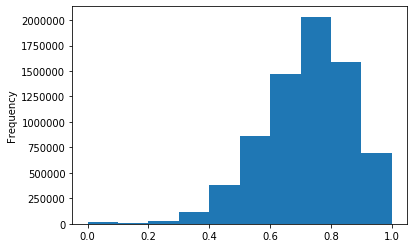

In [24]:
log_problem_df['problem_correct_rate'].plot.hist()

## Dataframe Export

In [26]:
info_content_df.to_csv('data/Info_Content_Edited.csv')

In [27]:
log_problem_df.to_csv('data/Log_Problem_Edited.csv')